In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Create Synthetic Reviews
np.random.seed(42)
reviews_pool = [
    "The wait time was way too long, but the doctor was great.",
    "Very clean clinic and friendly staff at the front desk.",
    "The doctor didn't listen to my concerns. Very disappointing.",
    "Scheduling an appointment is a nightmare. No one picks up.",
    "Highly professional medical care, felt very safe.",
    "The billing process is confusing and the office is messy.",
    "Exceptional service! The nurses are so kind.",
    "I had to wait 2 hours. This is unacceptable."
]

n_reviews = 1500
data = {
    'Review_ID': range(n_reviews),
    'Review_Text': np.random.choice(reviews_pool, n_reviews),
    'Clinic_Rating': np.random.choice([1, 2, 3, 4, 5], n_reviews, p=[0.1, 0.15, 0.2, 0.25, 0.3])
}

df_reviews = pd.DataFrame(data)
print("Patient Reviews Dataset Generated.")
df_reviews.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Patient Reviews Dataset Generated.


,Review_ID,Review_Text,Clinic_Rating
0,0,Exceptional service! The nurses are so kind.,2
1,1,Scheduling an appointment is a nightmare. No o...,5
2,2,"Highly professional medical care, felt very safe.",4
3,3,Exceptional service! The nurses are so kind.,3
4,4,The doctor didn't listen to my concerns. Very ...,2


In [43]:
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df_reviews['Sentiment_Score'] = df_reviews['Review_Text'].apply(get_sentiment)

# Label based on score
df_reviews['Sentiment_Label'] = df_reviews['Sentiment_Score'].apply(
    lambda s: 'Positive' if s >= 0.05 else ('Negative' if s <= -0.05 else 'Neutral')
)

print("Sentiment Analysis Complete.")
df_reviews[['Review_Text', 'Sentiment_Score', 'Sentiment_Label']].head()

Sentiment Analysis Complete.


,Review_Text,Sentiment_Score,Sentiment_Label
0,Exceptional service! The nurses are so kind.,0.6867,Positive
1,Scheduling an appointment is a nightmare. No o...,-0.2960,Negative
2,"Highly professional medical care, felt very safe.",0.7688,Positive
3,Exceptional service! The nurses are so kind.,0.6867,Positive
4,The doctor didn't listen to my concerns. Very ...,-0.5413,Negative


/tmp/ipython-input-3333647232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clinic_Rating', y='Sentiment_Score', data=df_reviews, palette='RdYlGn')


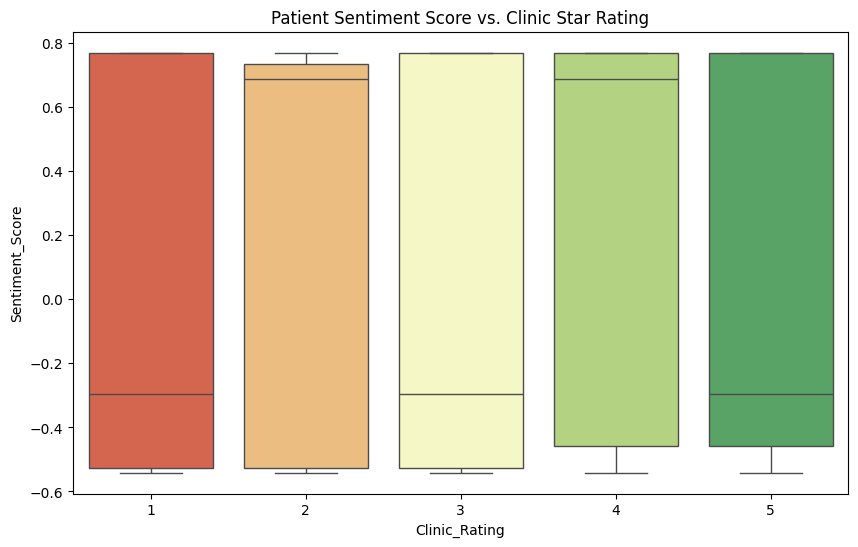

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clinic_Rating', y='Sentiment_Score', data=df_reviews, palette='RdYlGn')
plt.title('Patient Sentiment Score vs. Clinic Star Rating')
plt.show()

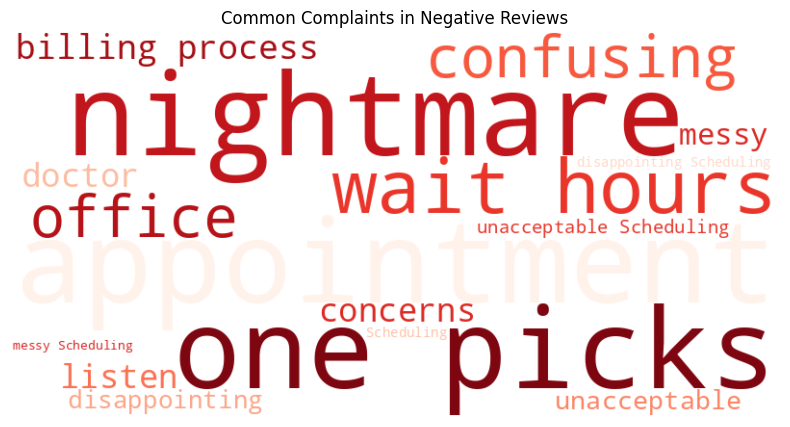

In [45]:
# Filter only negative reviews
negative_text = " ".join(df_reviews[df_reviews['Sentiment_Label'] == 'Negative']['Review_Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Complaints in Negative Reviews')
plt.show()

In [46]:
df_reviews['Mention_Wait'] = df_reviews['Review_Text'].str.contains('wait|time|hours', case=False)
df_reviews['Mention_Staff'] = df_reviews['Review_Text'].str.contains('staff|front desk|nurse', case=False)

# Group by sentiment to see how 'Wait Time' mentions correlate with negativity
wait_impact = df_reviews.groupby('Mention_Wait')['Sentiment_Label'].value_counts(normalize=True).unstack()

print("Percentage of 'Wait Time' mentions that result in Negative reviews:")
print(wait_impact)

Percentage of 'Wait Time' mentions that result in Negative reviews:
Sentiment_Label  Negative  Positive
Mention_Wait                       
False            0.500451  0.499549
True             0.480818  0.519182


In [47]:
total_neg = (df_reviews['Sentiment_Label'] == 'Negative').sum()
wait_neg = (df_reviews[df_reviews['Mention_Wait']]['Sentiment_Label'] == 'Negative').sum()

print(f"Marketing Insight: Out of {total_neg} negative reviews, {wait_neg} are directly related to wait times.")
print("Recommendation: Implement a digital queue system to improve reputation.")

Marketing Insight: Out of 743 negative reviews, 188 are directly related to wait times.
Recommendation: Implement a digital queue system to improve reputation.
